### Data Dictionary

Attribute description for german

Attribute 1:  (qualitative)
	       Status of existing checking account
               A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM /
		     salary assignments for at least 1 year
               A14 : no checking account

Attribute 2:  (numerical)
	      Duration in month

Attribute 3:  (qualitative)
	      Credit history
	      A30 : no credits taken/
		    all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/
		    other credits existing (not at this bank)

Attribute 4:  (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

Attribute 5:  (numerical)
	      Credit amount

Attibute 6:  (qualitative)
	      Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
              A65 :   unknown/ no savings account

Attribute 7:  (qualitative)
	      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

Attribute 8:  (numerical)
	      Installment rate in percentage of disposable income

Attribute 9:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

Attribute 10: (qualitative)
	      Other debtors / guarantors
	      A101 : none
	      A102 : co-applicant
	      A103 : guarantor

Attribute 11: (numerical)
	      Present residence since

Attribute 12: (qualitative)
	      Property
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/
				   life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property

Attribute 13: (numerical)
	      Age in years

Attribute 14: (qualitative)
	      Other installment plans 
	      A141 : bank
	      A142 : stores
	      A143 : none

Attribute 15: (qualitative)
	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

Attribute 16: (numerical)
              Number of existing credits at this bank

Attribute 17: (qualitative)
	      Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer

Attribute 18: (numerical)
	      Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
	      Telephone
	      A191 : none
	      A192 : yes, registered under the customers name

Attribute 20: (qualitative)
	      foreign worker
	      A201 : yes
	      A202 : no
          
Bad Credit:  (1 = Good, 2 = Bad)


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.


### Data Exploration

In [2]:
df = pd.read_csv("gcredit.csv",low_memory=False)

In [3]:
df

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,time_in_residence,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,6156361,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,2051359,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,8740590,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,3924540,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,9671059,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
1008,2180183,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
1009,3130615,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
1010,6267789,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               1012 non-null   int64 
 1   checking_account_status   1012 non-null   object
 2   loan_duration_mo          1012 non-null   int64 
 3   credit_history            1012 non-null   object
 4   purpose                   1012 non-null   object
 5   loan_amount               1012 non-null   int64 
 6   savings_account_balance   1012 non-null   object
 7   time_employed_yrs         1012 non-null   object
 8   payment_pcnt_income       1012 non-null   int64 
 9   gender_status             1012 non-null   object
 10  other_signators           1012 non-null   object
 11  time_in_residence         1012 non-null   int64 
 12  property                  1012 non-null   object
 13  age_yrs                   1012 non-null   int64 
 14  other_credit_outstanding

In [5]:
df.describe(include='all')

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,time_in_residence,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
count,1.012000e+03,1012,1012.000000,1012,1012,1012.000000,1012,1012,1012.000000,1012,1012,1012.000000,1012,1012.000000,1012,1012,1012.000000,1012,1012.000000,1012,1012,1012.000000
unique,NaN,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,NaN,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201,NaN
freq,NaN,399,NaN,540,283,NaN,612,346,NaN,554,916,NaN,335,NaN,825,723,NaN,637,NaN,602,974,NaN
mean,5.414623e+06,NaN,20.853755,NaN,NaN,3265.123518,NaN,NaN,2.970356,NaN,NaN,2.842885,NaN,35.583992,NaN,NaN,1.407115,NaN,1.155138,NaN,NaN,1.298419
std,2.569715e+06,NaN,12.031378,NaN,NaN,2817.639362,NaN,NaN,1.118636,NaN,NaN,1.105699,NaN,11.394459,NaN,NaN,0.580144,NaN,0.362216,NaN,NaN,0.457791
min,1.018706e+06,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,3.209457e+06,NaN,12.000000,NaN,NaN,1364.000000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
50%,5.477769e+06,NaN,18.000000,NaN,NaN,2309.000000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
75%,7.533738e+06,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,2.000000


In [6]:
df.shape

(1012, 22)

### Data Visualization

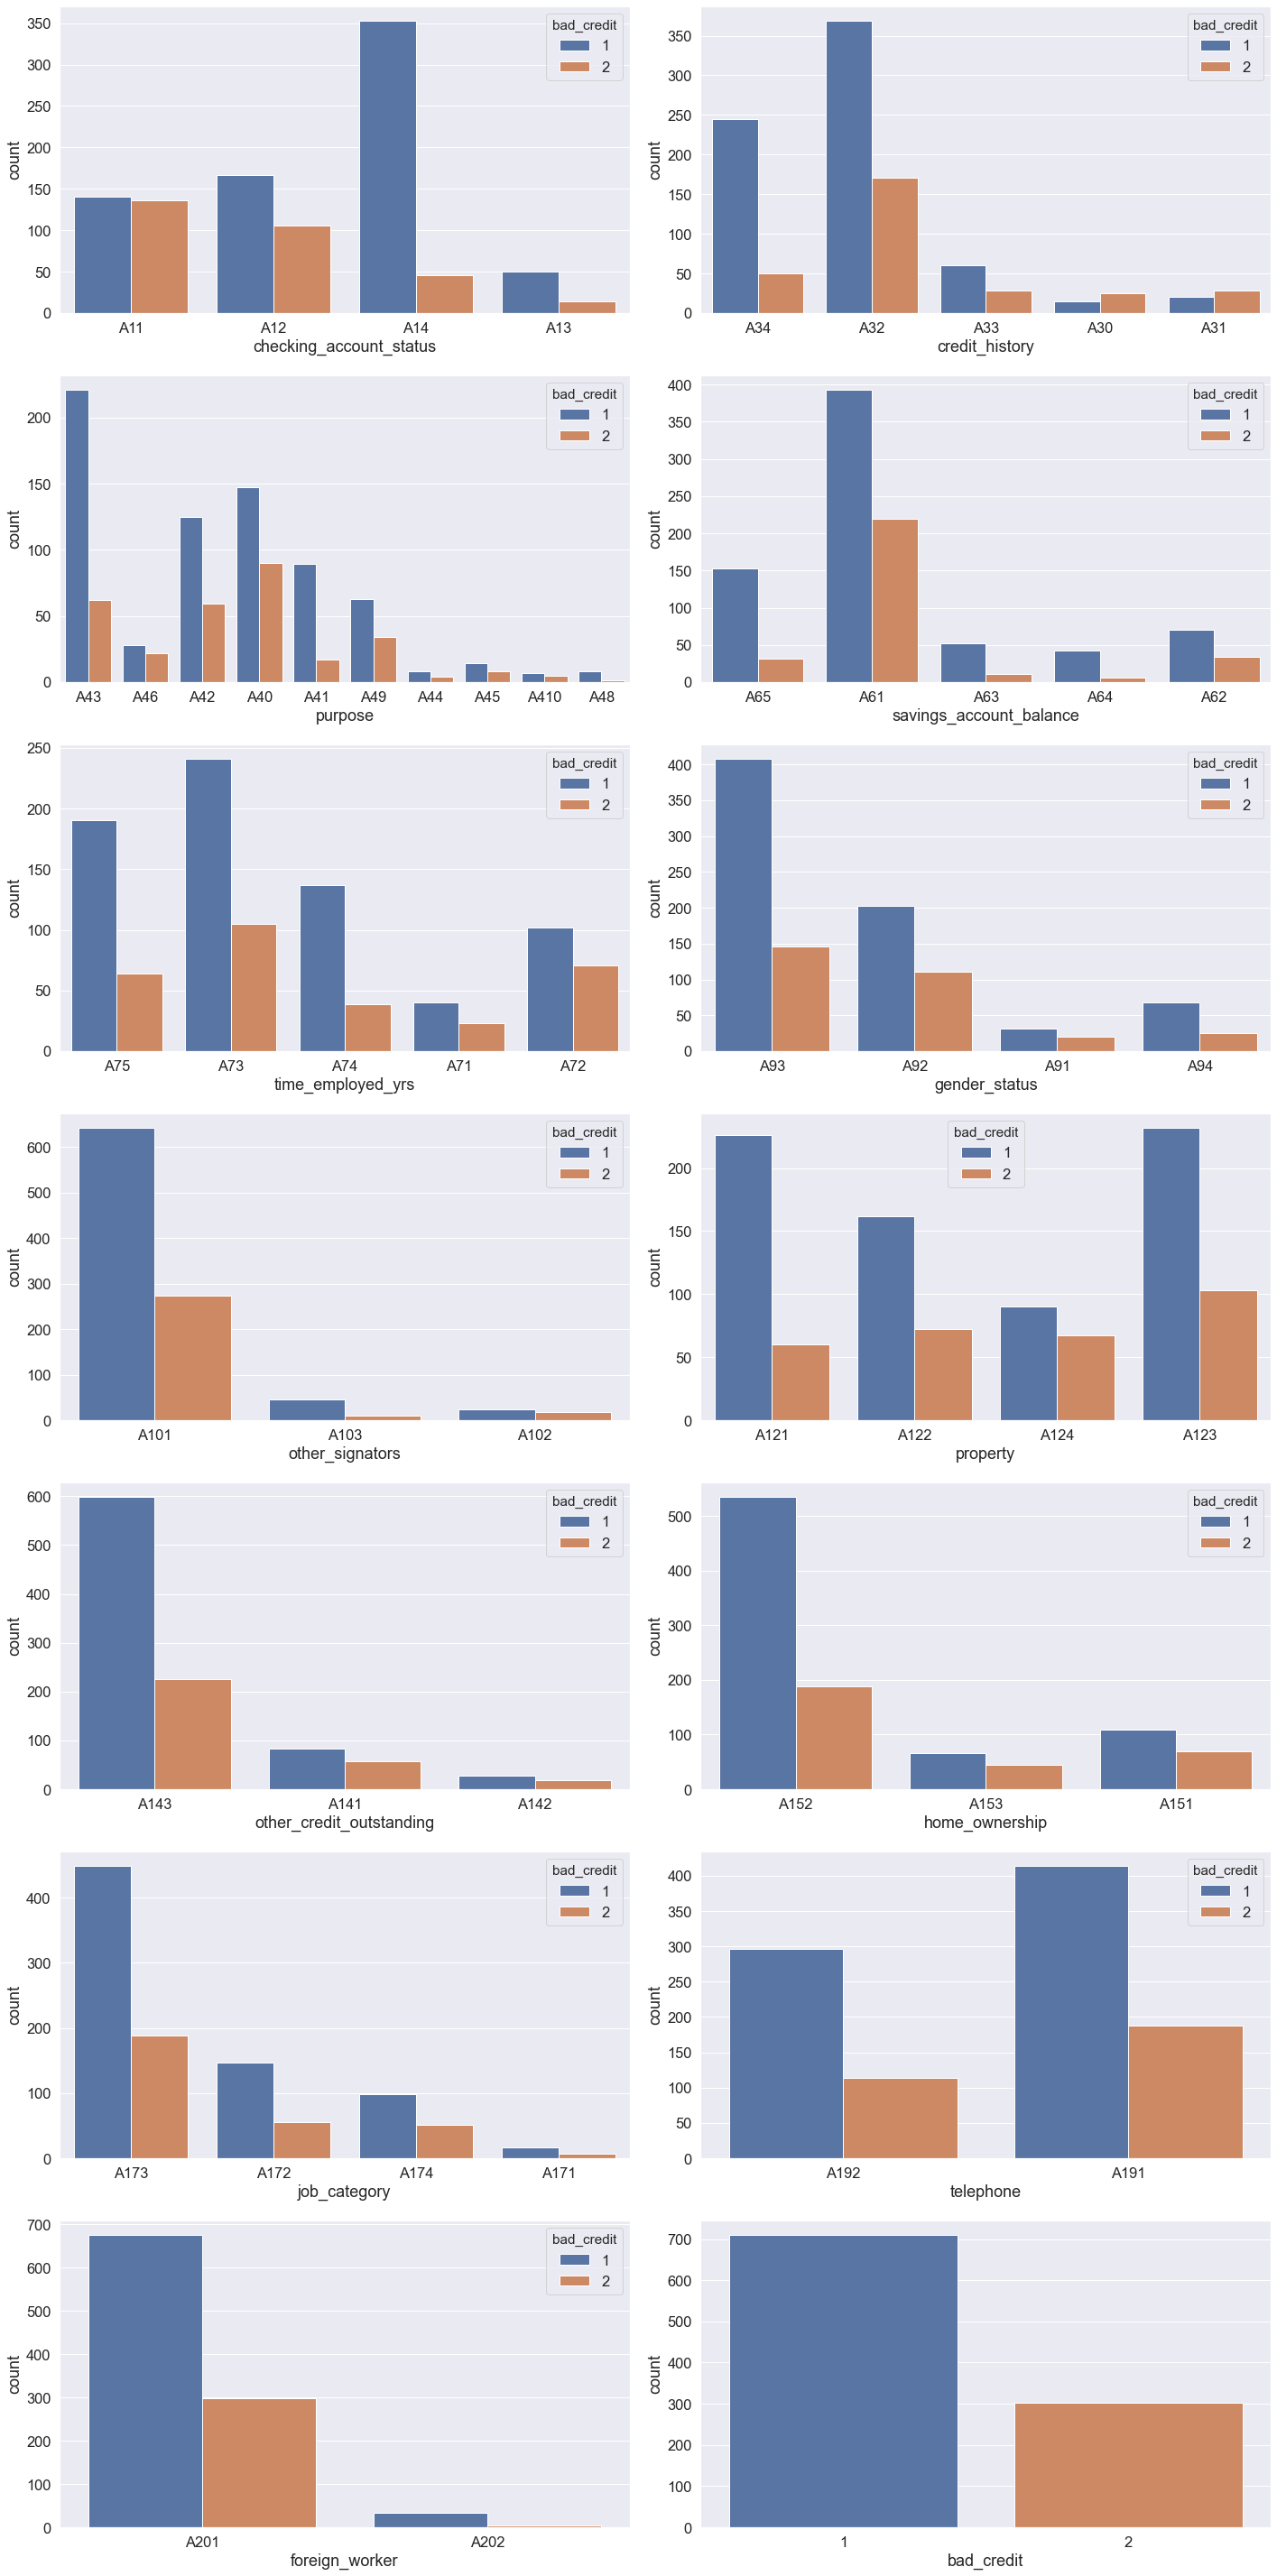

In [7]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.countplot(df.checking_account_status, hue=df.bad_credit)
plt.subplot(7,2,2)
sns.countplot(df.credit_history,hue=df.bad_credit)
plt.subplot(7,2,3)
sns.countplot(df.purpose,hue=df.bad_credit)
plt.subplot(7,2,4)
sns.countplot(df.savings_account_balance,hue=df.bad_credit)
plt.subplot(7,2,5)
sns.countplot(df.time_employed_yrs,hue=df.bad_credit)
plt.subplot(7,2,6)
sns.countplot(df.gender_status,hue=df.bad_credit)
plt.subplot(7,2,7)
sns.countplot(df.other_signators,hue=df.bad_credit)
plt.subplot(7,2,8)
sns.countplot(df.property,hue=df.bad_credit)
plt.subplot(7,2,9)
sns.countplot(df.other_credit_outstanding,hue=df.bad_credit)
plt.subplot(7,2,10)
sns.countplot(df.home_ownership,hue=df.bad_credit)
plt.subplot(7,2,11)
sns.countplot(df.job_category,hue=df.bad_credit)
plt.subplot(7,2,12)
sns.countplot(df.telephone,hue=df.bad_credit)
plt.subplot(7,2,13)
sns.countplot(df.foreign_worker,hue=df.bad_credit)
plt.subplot(7,2,14)
sns.countplot(df.bad_credit)

plt.tight_layout()
plt.show()

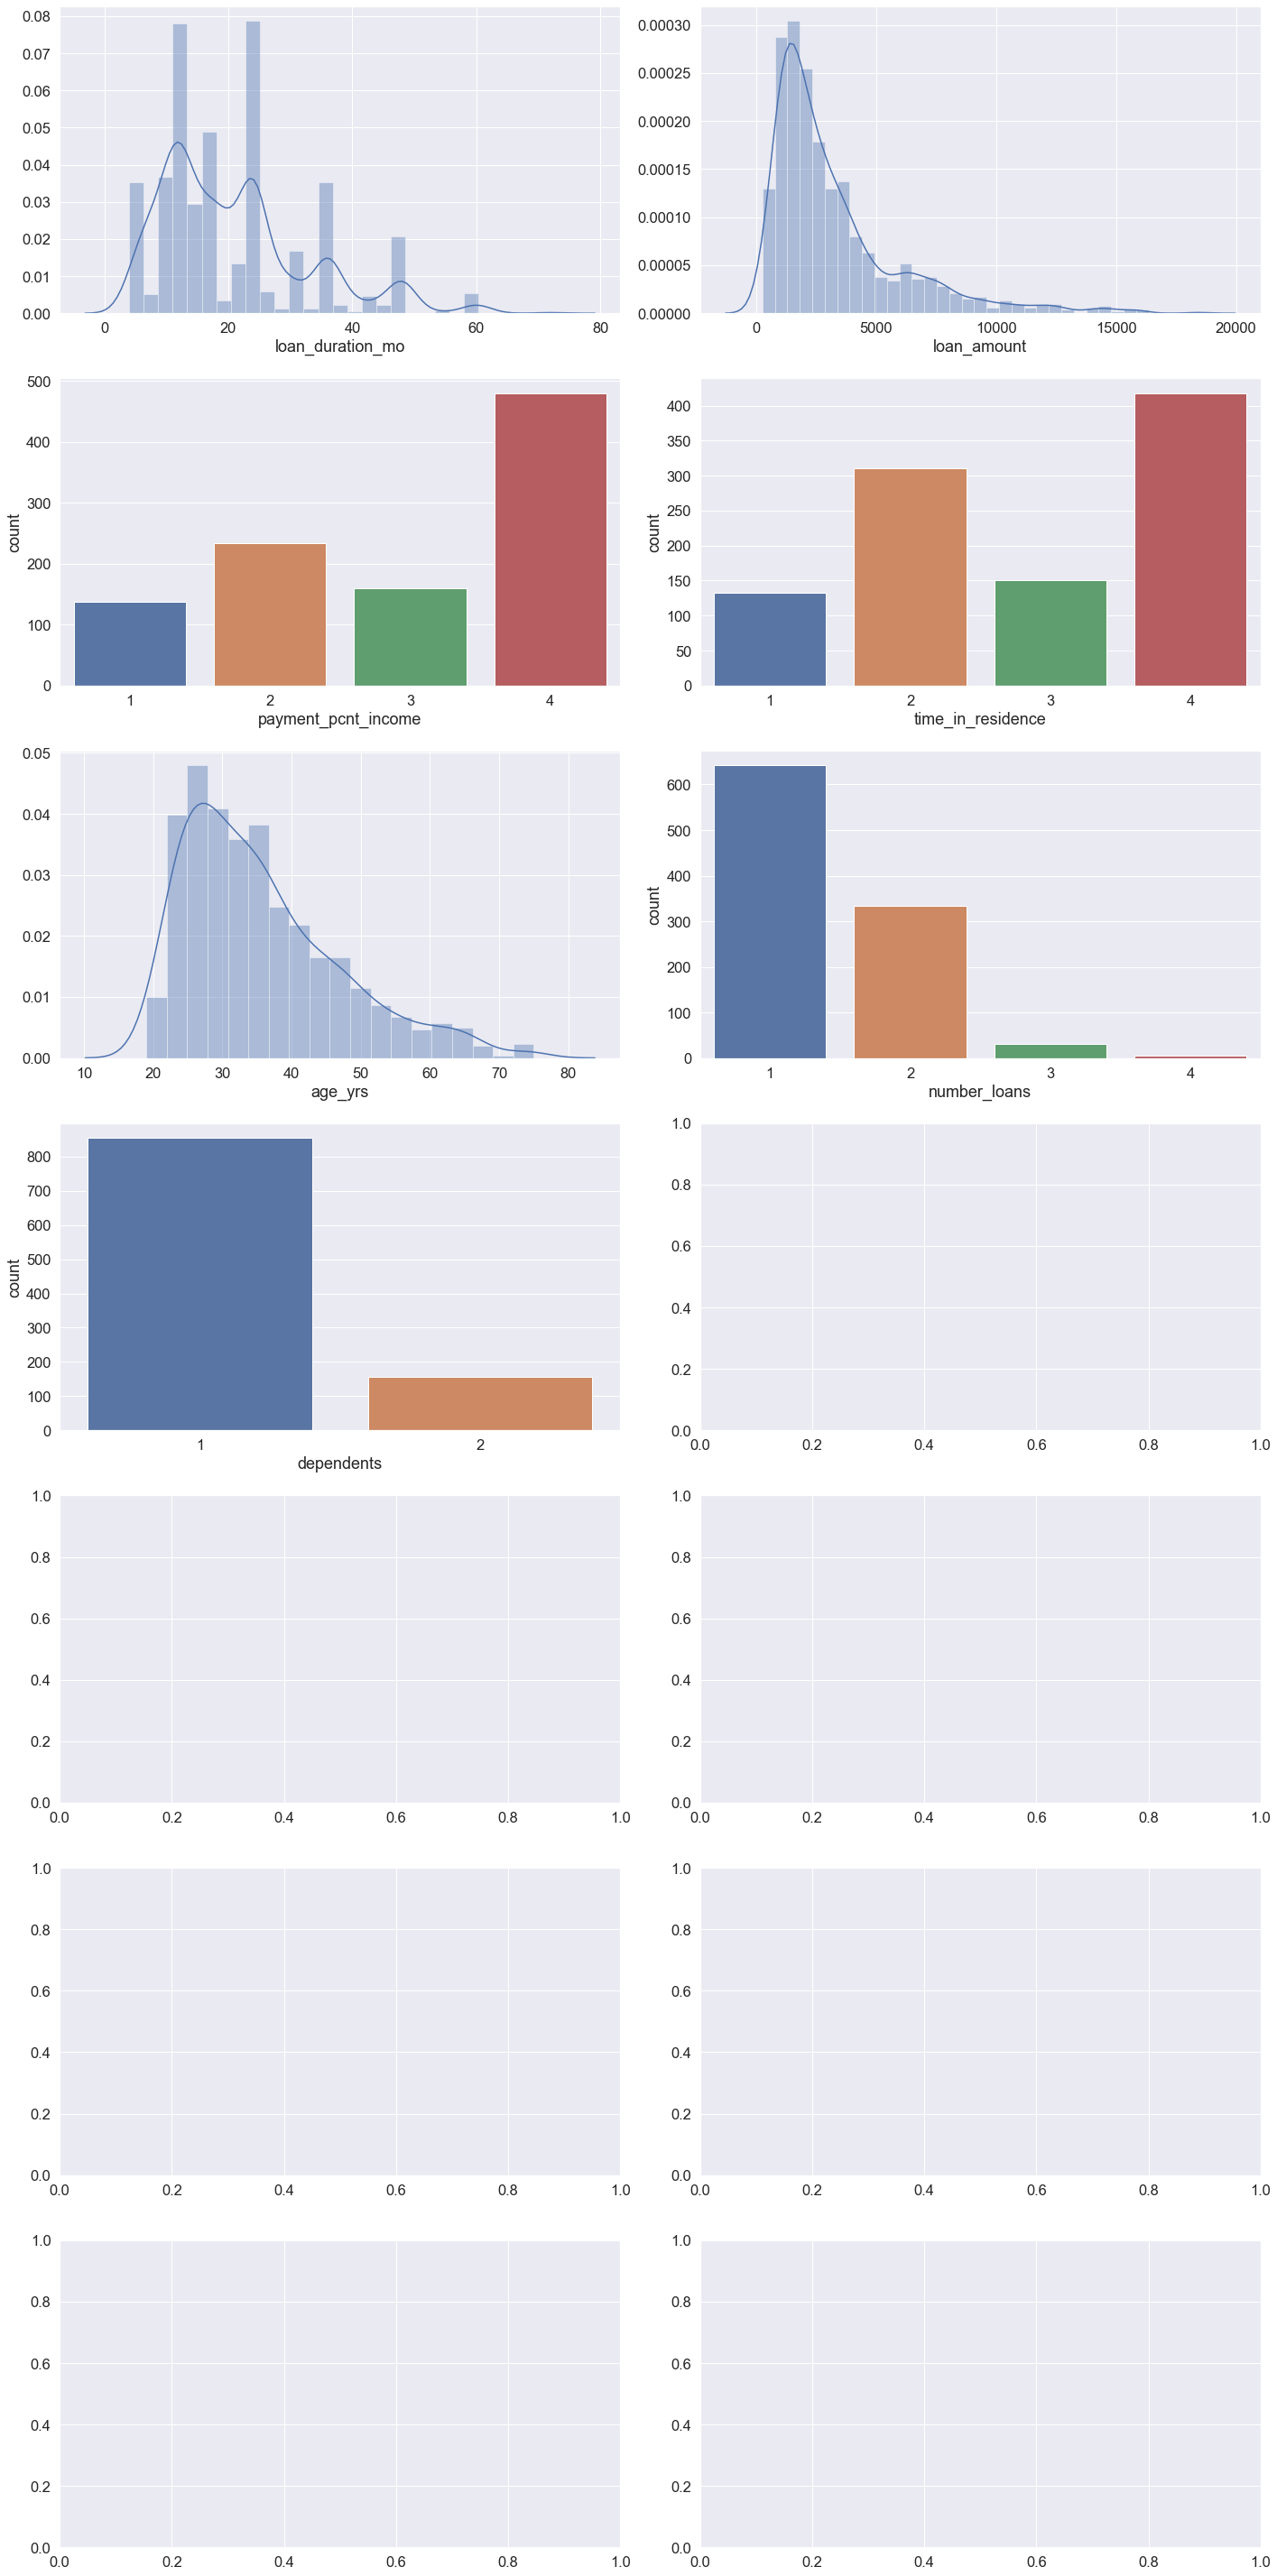

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.distplot(df.loan_duration_mo)
plt.subplot(7,2,2)
sns.distplot(df.loan_amount)
plt.subplot(7,2,3)
sns.countplot(df.payment_pcnt_income)
plt.subplot(7,2,4)
sns.countplot(df.time_in_residence)
plt.subplot(7,2,5)
sns.distplot(df.age_yrs)
plt.subplot(7,2,6)
sns.countplot(df.number_loans)
plt.subplot(7,2,7)
sns.countplot(df.dependents)
plt.subplot(7,2,8)
#sns.distplot()
plt.subplot(7,2,9)
#sns.distplot()
plt.subplot(7,2,10)
#sns.distplot()
plt.subplot(7,2,11)
#sns.distplot()
plt.subplot(7,2,12)
#sns.distplot()
plt.subplot(7,2,13)
#sns.distplot()
plt.subplot(7,2,14)
#sns.distplot()

plt.tight_layout()
plt.show()

In [9]:
df.corr()

,customer_id,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,bad_credit
customer_id,1.000000,0.038753,0.051238,0.035346,0.028034,0.025688,0.030114,0.034382,-0.040281
loan_duration_mo,0.038753,1.000000,0.623039,0.074567,0.039314,-0.038843,-0.017961,-0.025883,0.216428
loan_amount,0.051238,0.623039,1.000000,-0.271620,0.032638,0.033581,0.016665,0.013894,0.151932
payment_pcnt_income,0.035346,0.074567,-0.271620,1.000000,0.051410,0.047998,0.020139,-0.071637,0.077168
time_in_residence,0.028034,0.039314,0.032638,0.051410,1.000000,0.259853,0.087478,0.041163,0.002831
age_yrs,0.025688,-0.038843,0.033581,0.047998,0.259853,1.000000,0.156572,0.122060,-0.093553
number_loans,0.030114,-0.017961,0.016665,0.020139,0.087478,0.156572,1.000000,0.113359,-0.048225
dependents,0.034382,-0.025883,0.013894,-0.071637,0.041163,0.122060,0.113359,1.000000,-0.005081
bad_credit,-0.040281,0.216428,0.151932,0.077168,0.002831,-0.093553,-0.048225,-0.005081,1.000000


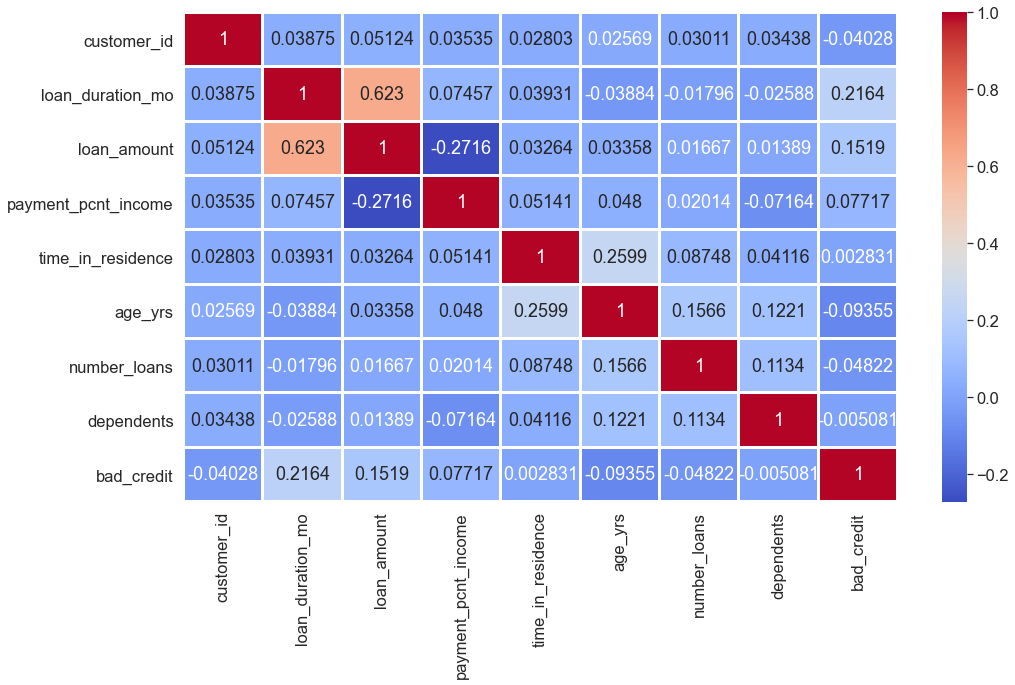

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.4g',linewidths=2)
plt.show()

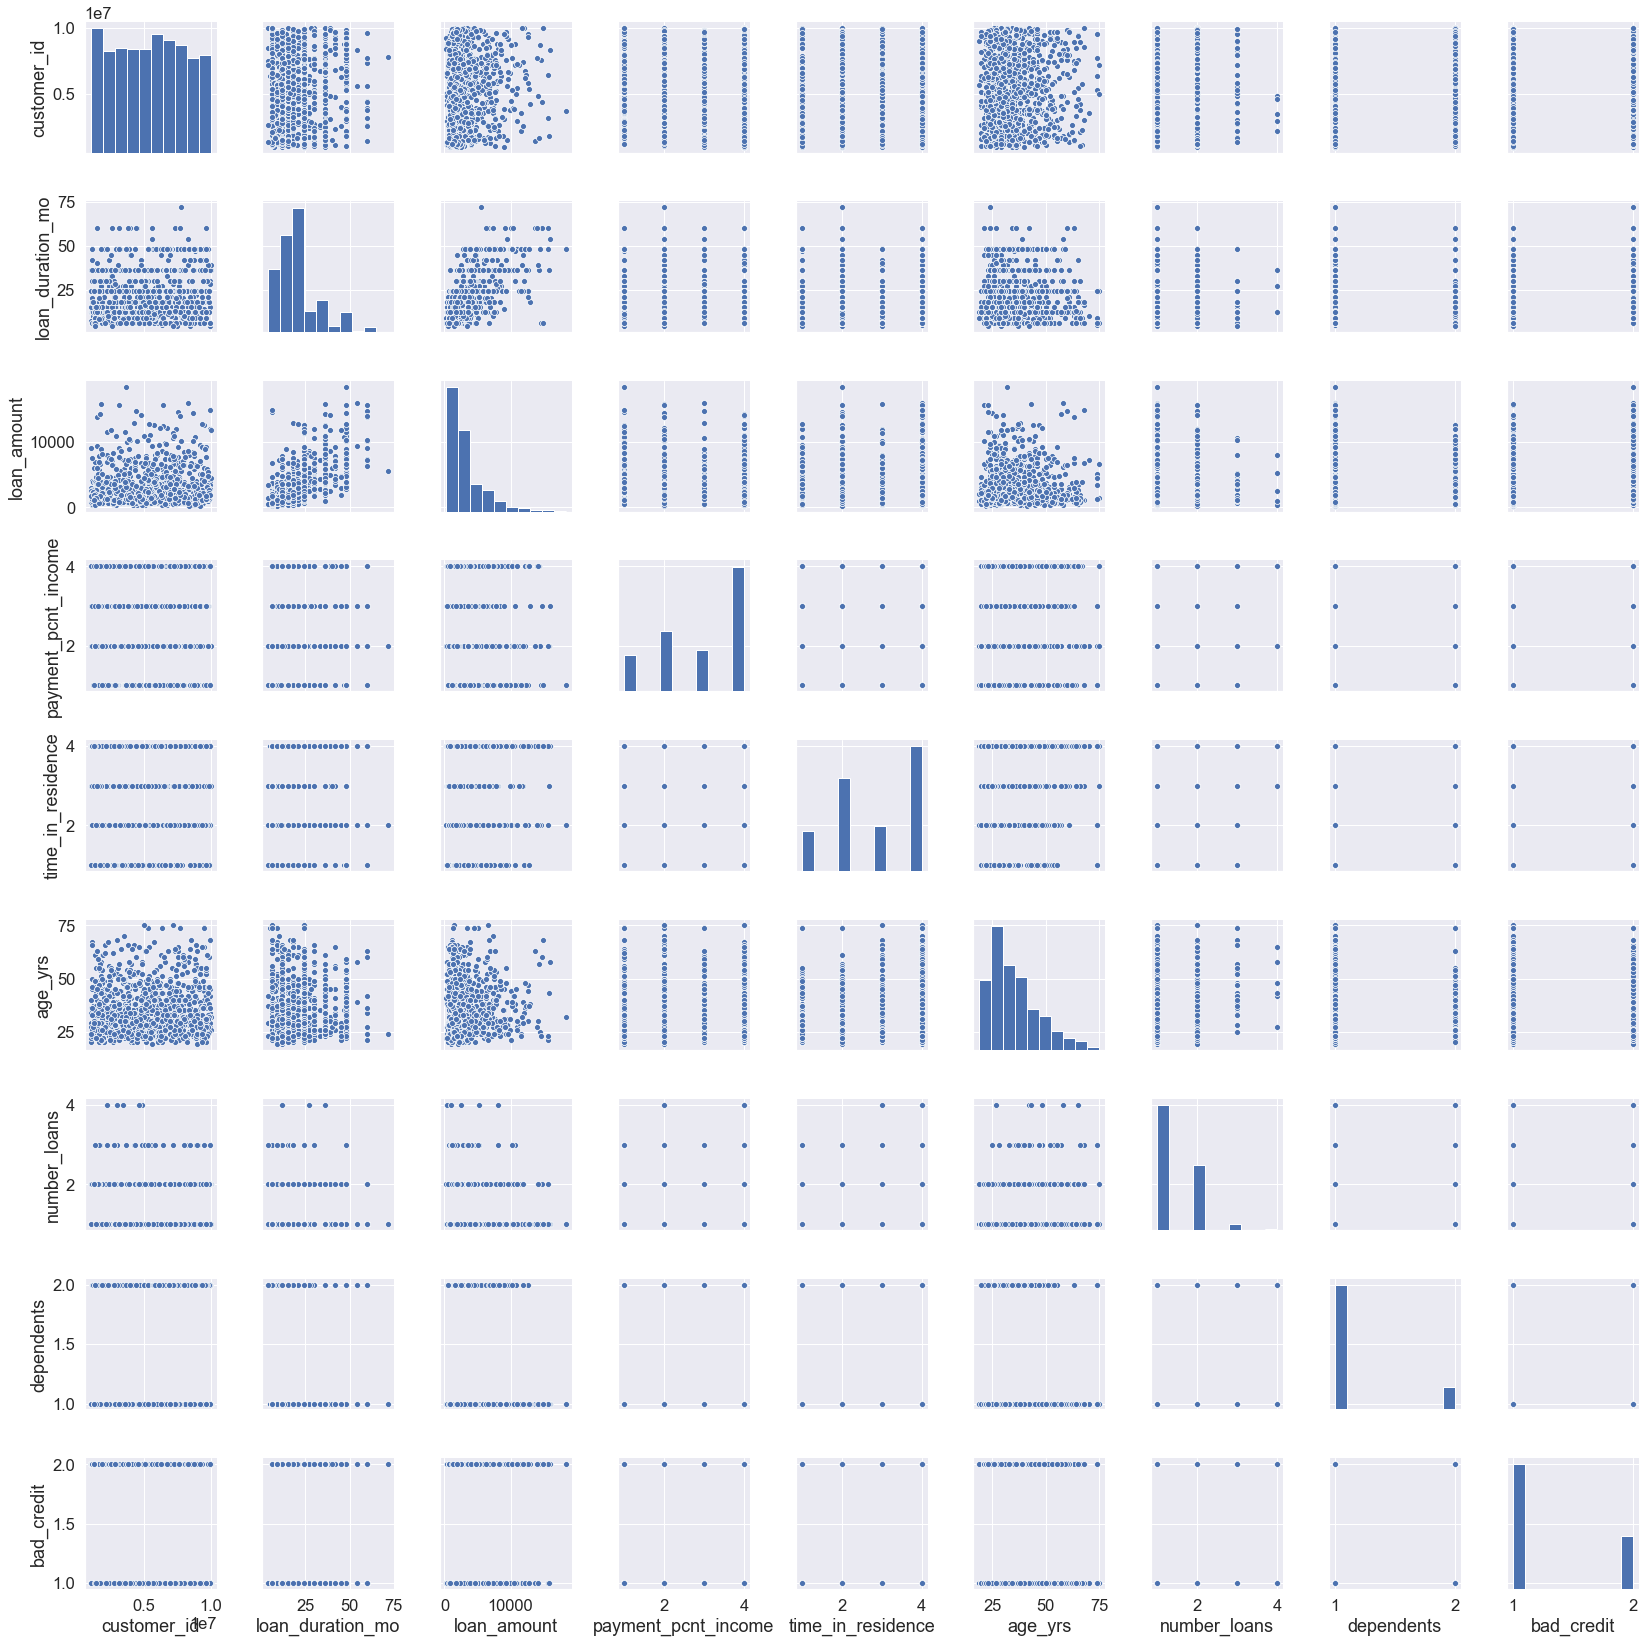

In [11]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [12]:
df.isnull().sum()

customer_id                 0
checking_account_status     0
loan_duration_mo            0
credit_history              0
purpose                     0
loan_amount                 0
savings_account_balance     0
time_employed_yrs           0
payment_pcnt_income         0
gender_status               0
other_signators             0
time_in_residence           0
property                    0
age_yrs                     0
other_credit_outstanding    0
home_ownership              0
number_loans                0
job_category                0
dependents                  0
telephone                   0
foreign_worker              0
bad_credit                  0
dtype: int64

### Treat Duplicate Values

In [13]:
df.duplicated(keep='first').sum()

12

In [14]:
df[df.duplicated(keep=False)]

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,time_in_residence,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
110,9517102,A13,6,A34,A40,1299,A61,A73,1,A93,A101,1,A121,74,A143,A152,3,A171,2,A191,A202,1
111,2801710,A12,9,A32,A42,918,A61,A73,4,A92,A101,1,A122,30,A143,A152,1,A173,1,A191,A201,2
226,6328203,A14,15,A32,A41,4657,A61,A73,3,A93,A101,2,A123,30,A143,A152,1,A173,1,A192,A201,1
234,7860808,A14,12,A32,A43,2141,A62,A74,3,A93,A101,1,A124,35,A143,A152,1,A173,1,A191,A201,1
244,4776602,A12,12,A32,A43,1155,A61,A75,3,A94,A103,3,A121,40,A141,A152,2,A172,1,A191,A201,1
245,7860808,A14,12,A32,A43,2141,A62,A74,3,A93,A101,1,A124,35,A143,A152,1,A173,1,A191,A201,1
321,7464596,A12,24,A32,A42,4351,A65,A73,1,A92,A101,4,A122,48,A143,A152,1,A172,1,A192,A201,1
436,9907330,A11,6,A34,A42,1872,A61,A71,4,A93,A101,4,A124,36,A143,A153,3,A174,1,A192,A201,1
450,6793340,A11,36,A32,A40,1842,A61,A72,4,A92,A101,4,A123,34,A143,A152,1,A173,1,A192,A201,2
493,7957595,A12,18,A32,A43,1113,A61,A73,4,A92,A103,4,A121,26,A143,A152,1,A172,2,A191,A201,1


In [15]:
#df.drop_duplicates(ignore_index=True, inplace=True)

### No need to drop as Customer ID is unique

### Treat Outliers

In [16]:
#df = pd.read_csv("")

In [17]:
df

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,time_in_residence,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,6156361,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,2051359,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,8740590,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,3924540,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,9671059,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
1008,2180183,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
1009,3130615,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
1010,6267789,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


In [18]:
df.describe()

,customer_id,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,bad_credit
count,1.012000e+03,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,5.414623e+06,20.853755,3265.123518,2.970356,2.842885,35.583992,1.407115,1.155138,1.298419
std,2.569715e+06,12.031378,2817.639362,1.118636,1.105699,11.394459,0.580144,0.362216,0.457791
min,1.018706e+06,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,3.209457e+06,12.000000,1364.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,5.477769e+06,18.000000,2309.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,7.533738e+06,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,9.994482e+06,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [19]:
windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5,
                         variables=['loan_duration_mo','loan_amount','age_yrs'])

In [20]:
windsorizer.fit(df)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['loan_duration_mo', 'loan_amount', 'age_yrs'])

In [21]:
df_t = windsorizer.transform(df)

In [22]:
df_t

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,time_in_residence,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,A11,6.0,A34,A43,1169.0,A65,A75,4,A93,A101,4,A121,64.5,A143,A152,2,A173,1,A192,A201,1
1,6156361,A12,42.0,A32,A43,5951.0,A61,A73,2,A92,A101,2,A121,22.0,A143,A152,1,A173,1,A191,A201,2
2,2051359,A14,12.0,A34,A46,2096.0,A61,A74,2,A93,A101,3,A121,49.0,A143,A152,1,A172,2,A191,A201,1
3,8740590,A11,42.0,A32,A42,7882.0,A61,A74,2,A93,A103,4,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,3924540,A11,24.0,A33,A40,4870.0,A61,A73,3,A93,A101,4,A124,53.0,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,9671059,A14,12.0,A32,A42,1736.0,A61,A74,3,A92,A101,4,A121,31.0,A143,A152,1,A172,1,A191,A201,1
1008,2180183,A11,30.0,A32,A41,3857.0,A61,A73,4,A91,A101,4,A122,40.0,A143,A152,1,A174,1,A192,A201,1
1009,3130615,A14,12.0,A32,A43,804.0,A61,A75,4,A93,A101,4,A123,38.0,A143,A152,1,A173,1,A191,A201,1
1010,6267789,A11,42.0,A32,A43,1845.0,A61,A73,4,A93,A101,4,A124,23.0,A143,A153,1,A173,1,A192,A201,2


In [23]:
df_t.describe()

,customer_id,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,bad_credit
count,1.012000e+03,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,5.414623e+06,20.264822,3046.361290,2.970356,2.842885,35.483202,1.407115,1.155138,1.298419
std,2.569715e+06,10.599770,2185.596183,1.118636,1.105699,11.100775,0.580144,0.362216,0.457791
min,1.018706e+06,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,3.209457e+06,12.000000,1364.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,5.477769e+06,18.000000,2309.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,7.533738e+06,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,9.994482e+06,42.000000,7884.625000,4.000000,4.000000,64.500000,4.000000,2.000000,2.000000


In [24]:
windsorizer.left_tail_caps_

{'loan_duration_mo': -6.0, 'loan_amount': -2548.375, 'age_yrs': 4.5}

In [25]:
windsorizer.right_tail_caps_

{'loan_duration_mo': 42.0, 'loan_amount': 7884.625, 'age_yrs': 64.5}

### Treat Data Types

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               1012 non-null   int64 
 1   checking_account_status   1012 non-null   object
 2   loan_duration_mo          1012 non-null   int64 
 3   credit_history            1012 non-null   object
 4   purpose                   1012 non-null   object
 5   loan_amount               1012 non-null   int64 
 6   savings_account_balance   1012 non-null   object
 7   time_employed_yrs         1012 non-null   object
 8   payment_pcnt_income       1012 non-null   int64 
 9   gender_status             1012 non-null   object
 10  other_signators           1012 non-null   object
 11  time_in_residence         1012 non-null   int64 
 12  property                  1012 non-null   object
 13  age_yrs                   1012 non-null   int64 
 14  other_credit_outstanding

### Feature Scaling

In [27]:
encoder = LabelEncoder()

In [28]:
df['bad_credit'] = encoder.fit_transform(df['bad_credit'])

In [29]:
df

,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,time_in_residence,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0
1,6156361,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,1
2,2051359,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0
3,8740590,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0
4,3924540,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,9671059,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,0
1008,2180183,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,0
1009,3130615,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,0
1010,6267789,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,1


In [30]:
df_cat = df[['checking_account_status', 'credit_history', 'purpose','savings_account_balance','time_employed_yrs',
            'gender_status', 'other_signators', 'property', 'other_credit_outstanding','home_ownership',
            'job_category','telephone', 'foreign_worker' ]]

In [31]:
df_cat

,checking_account_status,credit_history,purpose,savings_account_balance,time_employed_yrs,gender_status,other_signators,property,other_credit_outstanding,home_ownership,job_category,telephone,foreign_worker
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,A14,A32,A42,A61,A74,A92,A101,A121,A143,A152,A172,A191,A201
1008,A11,A32,A41,A61,A73,A91,A101,A122,A143,A152,A174,A192,A201
1009,A14,A32,A43,A61,A75,A93,A101,A123,A143,A152,A173,A191,A201
1010,A11,A32,A43,A61,A73,A93,A101,A124,A143,A153,A173,A192,A201


In [32]:
category = pd.get_dummies(df_cat,prefix='cat',drop_first=True)

In [33]:
category

,cat_A12,cat_A13,cat_A14,cat_A31,cat_A32,cat_A33,cat_A34,cat_A41,cat_A410,cat_A42,cat_A43,cat_A44,cat_A45,cat_A46,cat_A48,cat_A49,cat_A62,cat_A63,cat_A64,cat_A65,cat_A72,cat_A73,cat_A74,cat_A75,cat_A92,cat_A93,cat_A94,cat_A102,cat_A103,cat_A122,cat_A123,cat_A124,cat_A142,cat_A143,cat_A152,cat_A153,cat_A172,cat_A173,cat_A174,cat_A192,cat_A202
0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
1008,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0
1009,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0
1010,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0


In [34]:
df_num = df[['customer_id','loan_duration_mo','loan_amount','payment_pcnt_income','time_in_residence','age_yrs',
            'number_loans','dependents']]

In [35]:
df_num

,customer_id,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
0,1122334,6,1169,4,4,67,2,1
1,6156361,48,5951,2,2,22,1,1
2,2051359,12,2096,2,3,49,1,2
3,8740590,42,7882,2,4,45,1,2
4,3924540,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...,...
1007,9671059,12,1736,3,4,31,1,1
1008,2180183,30,3857,4,4,40,1,1
1009,3130615,12,804,4,4,38,1,1
1010,6267789,45,1845,4,4,23,1,1


In [36]:
label = df['bad_credit']

In [37]:
label

0       0
1       1
2       0
3       0
4       1
       ..
1007    0
1008    0
1009    0
1010    1
1011    0
Name: bad_credit, Length: 1012, dtype: int64

In [38]:
df2 = pd.concat([df_num,category,label],axis=1)

In [39]:
df2

,customer_id,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,cat_A12,cat_A13,cat_A14,cat_A31,cat_A32,cat_A33,cat_A34,cat_A41,cat_A410,cat_A42,cat_A43,cat_A44,cat_A45,cat_A46,cat_A48,cat_A49,cat_A62,cat_A63,cat_A64,cat_A65,cat_A72,cat_A73,cat_A74,cat_A75,cat_A92,cat_A93,cat_A94,cat_A102,cat_A103,cat_A122,cat_A123,cat_A124,cat_A142,cat_A143,cat_A152,cat_A153,cat_A172,cat_A173,cat_A174,cat_A192,cat_A202,bad_credit
0,1122334,6,1169,4,4,67,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
1,6156361,48,5951,2,2,22,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,2051359,12,2096,2,3,49,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
3,8740590,42,7882,2,4,45,1,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0
4,3924540,24,4870,3,4,53,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,9671059,12,1736,3,4,31,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
1008,2180183,30,3857,4,4,40,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0
1009,3130615,12,804,4,4,38,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0
1010,6267789,45,1845,4,4,23,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1


In [40]:
df2 = pd.read_csv("gcredit1.csv")

In [41]:
df2

,customer_id,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,cat_A12,cat_A13,cat_A14,cat_A31,cat_A32,cat_A33,cat_A34,cat_A41,cat_A410,cat_A42,cat_A43,cat_A44,cat_A45,cat_A46,cat_A48,cat_A49,cat_A62,cat_A63,cat_A64,cat_A65,cat_A72,cat_A73,cat_A74,cat_A75,cat_A92,cat_A93,cat_A94,cat_A102,cat_A103,cat_A122,cat_A123,cat_A124,cat_A142,cat_A143,cat_A152,cat_A153,cat_A172,cat_A173,cat_A174,cat_A192,cat_A202,bad_credit
0,1122334,6,1169,4,4,67,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
1,6156361,48,5951,2,2,22,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,2051359,12,2096,2,3,49,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
3,8740590,42,7882,2,4,45,1,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0
4,3924540,24,4870,3,4,53,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,9671059,12,1736,3,4,31,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
1008,2180183,30,3857,4,4,40,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0
1009,3130615,12,804,4,4,38,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0
1010,6267789,45,1845,4,4,23,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1


In [42]:
df2_num = df2[['loan_duration_mo','loan_amount','payment_pcnt_income','time_in_residence','age_yrs',
            'number_loans','dependents']]

In [43]:
df2_num

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
1007,12,1736,3,4,31,1,1
1008,30,3857,4,4,40,1,1
1009,12,804,4,4,38,1,1
1010,45,1845,4,4,23,1,1


In [44]:
minmax = MinMaxScaler()

In [45]:
df2num = minmax.fit_transform(df2_num)

In [46]:
df2num

array([[0.02941176, 0.05056674, 1.        , ..., 0.85714286, 0.33333333,
        0.        ],
       [0.64705882, 0.31368989, 0.33333333, ..., 0.05357143, 0.        ,
        0.        ],
       [0.11764706, 0.10157368, 0.33333333, ..., 0.53571429, 0.        ,
        1.        ],
       ...,
       [0.11764706, 0.03048311, 1.        , ..., 0.33928571, 0.        ,
        0.        ],
       [0.60294118, 0.08776274, 1.        , ..., 0.07142857, 0.        ,
        0.        ],
       [0.60294118, 0.23803235, 0.66666667, ..., 0.14285714, 0.        ,
        0.        ]])

In [47]:
df2num = pd.DataFrame(df2num,columns=df2_num.columns)

In [48]:
df2num

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0
...,...,...,...,...,...,...,...
1007,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0
1008,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0
1009,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0
1010,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0


In [49]:
df2num.describe()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,0.247849,0.165903,0.656785,0.614295,0.296143,0.135705,0.155138
std,0.176932,0.155037,0.372879,0.368566,0.203472,0.193381,0.362216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117647,0.061296,0.333333,0.333333,0.142857,0.000000,0.000000
50%,0.205882,0.113294,0.666667,0.666667,0.250000,0.000000,0.000000
75%,0.294118,0.204812,1.000000,1.000000,0.410714,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
df2.drop(['loan_duration_mo','loan_amount','payment_pcnt_income','time_in_residence','age_yrs',
            'number_loans','dependents'],axis=1,inplace=True)

In [51]:
df2

,customer_id,cat_A12,cat_A13,cat_A14,cat_A31,cat_A32,cat_A33,cat_A34,cat_A41,cat_A410,cat_A42,cat_A43,cat_A44,cat_A45,cat_A46,cat_A48,cat_A49,cat_A62,cat_A63,cat_A64,cat_A65,cat_A72,cat_A73,cat_A74,cat_A75,cat_A92,cat_A93,cat_A94,cat_A102,cat_A103,cat_A122,cat_A123,cat_A124,cat_A142,cat_A143,cat_A152,cat_A153,cat_A172,cat_A173,cat_A174,cat_A192,cat_A202,bad_credit
0,1122334,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
1,6156361,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,2051359,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
3,8740590,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0
4,3924540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,9671059,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
1008,2180183,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0
1009,3130615,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0
1010,6267789,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1


In [52]:
df3 = pd.concat([df2num,df2],axis=1)

In [53]:
df3

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,customer_id,cat_A12,cat_A13,cat_A14,cat_A31,cat_A32,cat_A33,cat_A34,cat_A41,cat_A410,cat_A42,cat_A43,cat_A44,cat_A45,cat_A46,cat_A48,cat_A49,cat_A62,cat_A63,cat_A64,cat_A65,cat_A72,cat_A73,cat_A74,cat_A75,cat_A92,cat_A93,cat_A94,cat_A102,cat_A103,cat_A122,cat_A123,cat_A124,cat_A142,cat_A143,cat_A152,cat_A153,cat_A172,cat_A173,cat_A174,cat_A192,cat_A202,bad_credit
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1122334,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,6156361,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,2051359,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,8740590,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,3924540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0,9671059,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
1008,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0,2180183,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0
1009,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0,3130615,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0
1010,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0,6267789,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1


### Create and save processed dataset

In [54]:
#df2.to_csv('gcredit1.csv',index=False)

In [55]:
#df3.to_csv('gcredittrain.csv',index=False)

### Model Training

In [56]:
df3

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,customer_id,cat_A12,cat_A13,cat_A14,cat_A31,cat_A32,cat_A33,cat_A34,cat_A41,cat_A410,cat_A42,cat_A43,cat_A44,cat_A45,cat_A46,cat_A48,cat_A49,cat_A62,cat_A63,cat_A64,cat_A65,cat_A72,cat_A73,cat_A74,cat_A75,cat_A92,cat_A93,cat_A94,cat_A102,cat_A103,cat_A122,cat_A123,cat_A124,cat_A142,cat_A143,cat_A152,cat_A153,cat_A172,cat_A173,cat_A174,cat_A192,cat_A202,bad_credit
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1122334,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,6156361,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,2051359,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,8740590,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,3924540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0,9671059,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
1008,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0,2180183,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0
1009,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0,3130615,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0
1010,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0,6267789,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1


In [57]:
df3.drop(['customer_id'],axis=1,inplace=True)

In [58]:
df3

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,cat_A12,cat_A13,cat_A14,cat_A31,cat_A32,cat_A33,cat_A34,cat_A41,cat_A410,cat_A42,cat_A43,cat_A44,cat_A45,cat_A46,cat_A48,cat_A49,cat_A62,cat_A63,cat_A64,cat_A65,cat_A72,cat_A73,cat_A74,cat_A75,cat_A92,cat_A93,cat_A94,cat_A102,cat_A103,cat_A122,cat_A123,cat_A124,cat_A142,cat_A143,cat_A152,cat_A153,cat_A172,cat_A173,cat_A174,cat_A192,cat_A202,bad_credit
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
1008,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0
1009,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0
1010,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1


In [59]:
X = df3.iloc[:,0:48]
y = df3.iloc[:,48]

In [60]:
X.values, y.values

(array([[0.02941176, 0.05056674, 1.        , ..., 0.        , 1.        ,
         0.        ],
        [0.64705882, 0.31368989, 0.33333333, ..., 0.        , 0.        ,
         0.        ],
        [0.11764706, 0.10157368, 0.33333333, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.11764706, 0.03048311, 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.60294118, 0.08776274, 1.        , ..., 0.        , 1.        ,
         0.        ],
        [0.60294118, 0.23803235, 0.66666667, ..., 0.        , 0.        ,
         0.        ]]),
 array([0, 1, 0, ..., 0, 1, 0], dtype=int64))

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((809, 48), (203, 48), (809,), (203,))

In [63]:
xgb = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [64]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=10)

[0]	validation_0-error:0.310345
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.339901
[2]	validation_0-error:0.330049
[3]	validation_0-error:0.310345
[4]	validation_0-error:0.315271
[5]	validation_0-error:0.310345
[6]	validation_0-error:0.300493
[7]	validation_0-error:0.295566
[8]	validation_0-error:0.305419
[9]	validation_0-error:0.300493
[10]	validation_0-error:0.295566
[11]	validation_0-error:0.295566
[12]	validation_0-error:0.300493
[13]	validation_0-error:0.300493
[14]	validation_0-error:0.300493
[15]	validation_0-error:0.295566
[16]	validation_0-error:0.285714
[17]	validation_0-error:0.29064
[18]	validation_0-error:0.29064
[19]	validation_0-error:0.29064
[20]	validation_0-error:0.295566
[21]	validation_0-error:0.285714
[22]	validation_0-error:0.295566
[23]	validation_0-error:0.295566
[24]	validation_0-error:0.295566
[25]	validation_0-error:0.305419
[26]	validation_0-error:0.300493
Stopping. Best iteration:
[16]	validation_0-error:0.2857

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
y_pred = xgb.predict(X_test)

In [66]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0], dtype=int64)

### Model Evaluation

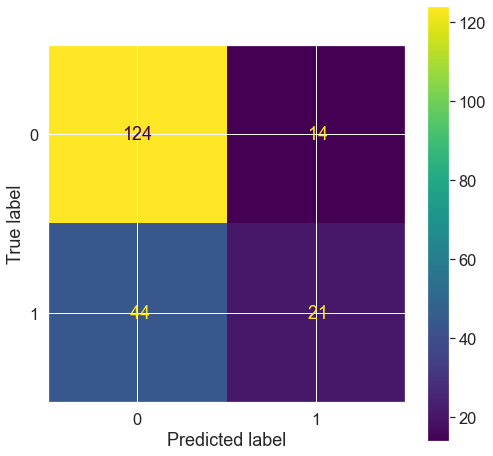

In [67]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(xgb,X_test,y_test,values_format='3g',ax=ax)
plt.show()

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       138
           1       0.60      0.32      0.42        65

    accuracy                           0.71       203
   macro avg       0.67      0.61      0.62       203
weighted avg       0.69      0.71      0.69       203



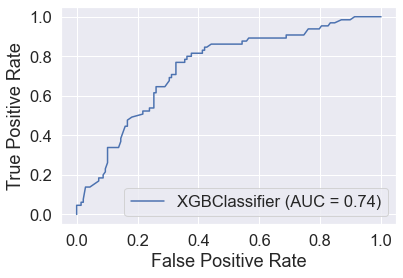

In [69]:
plot_roc_curve(xgb,X_test,y_test)
plt.show()

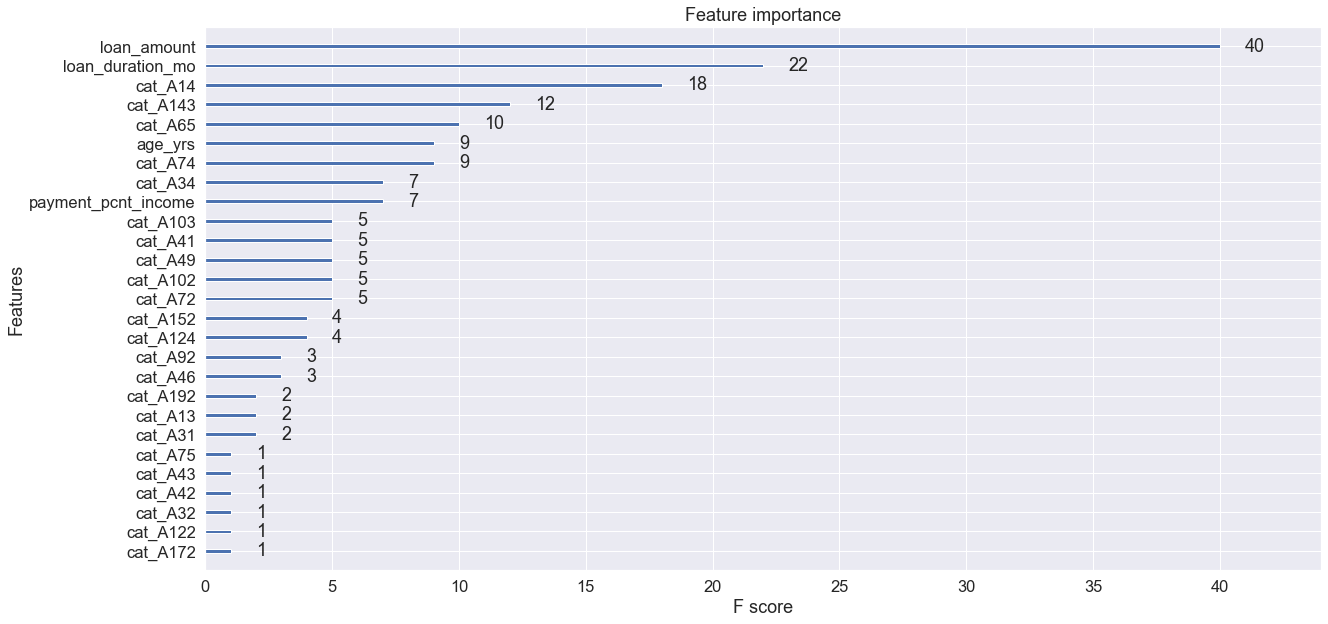

In [70]:
fig, ax = plt.subplots(figsize=(20,10))
plot_importance(xgb,ax=ax,importance_type='weight')
plt.show()

### Cross-Validation

In [71]:
cv = cross_val_score(xgb,X,y,cv=5,verbose=2,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [72]:
cv.mean()

0.75792323074672

### Feature Selection

In [73]:
df3

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,cat_A12,cat_A13,cat_A14,cat_A31,cat_A32,cat_A33,cat_A34,cat_A41,cat_A410,cat_A42,cat_A43,cat_A44,cat_A45,cat_A46,cat_A48,cat_A49,cat_A62,cat_A63,cat_A64,cat_A65,cat_A72,cat_A73,cat_A74,cat_A75,cat_A92,cat_A93,cat_A94,cat_A102,cat_A103,cat_A122,cat_A123,cat_A124,cat_A142,cat_A143,cat_A152,cat_A153,cat_A172,cat_A173,cat_A174,cat_A192,cat_A202,bad_credit
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
1008,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0
1009,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0
1010,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1


In [74]:
df4 = df3[['loan_duration_mo','loan_amount', 'cat_A14','cat_A143','cat_A65','age_yrs','cat_A74','bad_credit']]

In [75]:
df4

,loan_duration_mo,loan_amount,cat_A14,cat_A143,cat_A65,age_yrs,cat_A74,bad_credit
0,0.029412,0.050567,0,1,1,0.857143,0,0
1,0.647059,0.313690,0,1,0,0.053571,0,1
2,0.117647,0.101574,1,1,0,0.535714,1,0
3,0.558824,0.419941,0,1,0,0.464286,1,0
4,0.294118,0.254209,0,1,0,0.607143,0,1
...,...,...,...,...,...,...,...,...
1007,0.117647,0.081765,1,1,0,0.214286,1,0
1008,0.382353,0.198470,0,1,0,0.375000,0,0
1009,0.117647,0.030483,1,1,0,0.339286,0,0
1010,0.602941,0.087763,0,1,0,0.071429,0,1


In [76]:
X = df4.iloc[:,0:7]
y = df4.iloc[:,7]

In [77]:
X.values,y.values

(array([[0.02941176, 0.05056674, 0.        , ..., 1.        , 0.85714286,
         0.        ],
        [0.64705882, 0.31368989, 0.        , ..., 0.        , 0.05357143,
         0.        ],
        [0.11764706, 0.10157368, 1.        , ..., 0.        , 0.53571429,
         1.        ],
        ...,
        [0.11764706, 0.03048311, 1.        , ..., 0.        , 0.33928571,
         0.        ],
        [0.60294118, 0.08776274, 0.        , ..., 0.        , 0.07142857,
         0.        ],
        [0.60294118, 0.23803235, 0.        , ..., 0.        , 0.14285714,
         0.        ]]),
 array([0, 1, 0, ..., 0, 1, 0], dtype=int64))

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((809, 7), (203, 7), (809,), (203,))

In [80]:
xgb = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [81]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=10)

[0]	validation_0-error:0.300493
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.295566
[2]	validation_0-error:0.300493
[3]	validation_0-error:0.300493
[4]	validation_0-error:0.300493
[5]	validation_0-error:0.300493
[6]	validation_0-error:0.275862
[7]	validation_0-error:0.275862
[8]	validation_0-error:0.275862
[9]	validation_0-error:0.275862
[10]	validation_0-error:0.275862
[11]	validation_0-error:0.275862
[12]	validation_0-error:0.275862
[13]	validation_0-error:0.26601
[14]	validation_0-error:0.26601
[15]	validation_0-error:0.270936
[16]	validation_0-error:0.270936
[17]	validation_0-error:0.270936
[18]	validation_0-error:0.275862
[19]	validation_0-error:0.270936
[20]	validation_0-error:0.26601
[21]	validation_0-error:0.261084
[22]	validation_0-error:0.26601
[23]	validation_0-error:0.26601
[24]	validation_0-error:0.26601
[25]	validation_0-error:0.26601
[26]	validation_0-error:0.26601
[27]	validation_0-error:0.26601
[28]	validation_0-error:0.266

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [82]:
y_pred = xgb.predict(X_test)

In [83]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0], dtype=int64)

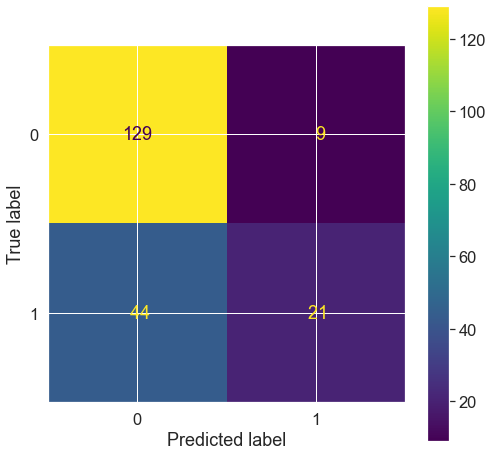

In [84]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(xgb,X_test,y_test,values_format='3g',ax=ax)
plt.show()

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       138
           1       0.70      0.32      0.44        65

    accuracy                           0.74       203
   macro avg       0.72      0.63      0.64       203
weighted avg       0.73      0.74      0.71       203



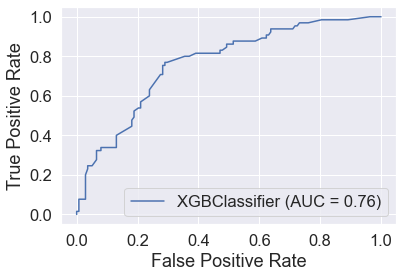

In [86]:
plot_roc_curve(xgb,X_test,y_test)
plt.show()

### Model Tuning

In [87]:
model = XGBClassifier()

In [88]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [89]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, n_jobs=-1, scoring='accuracy')

In [90]:
randm.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                

In [91]:
randm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=4,
              learning rate=0.26, learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=2, missing=None, n_estimators=700,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.7, verbosity=1)

In [92]:
randm.best_score_

0.7503105590062111

In [93]:
randm.best_params_

{'subsample': 0.7,
 'n_estimators': 700,
 'min_child_weight': 2,
 'max_depth': 7,
 'learning rate': 0.26,
 'gamma': 4,
 'colsample_bytree': 0.6}

### New Model

In [97]:
xgbnew = XGBClassifier(random_state=0, n_estimators=700, objective='binary:logistic',max_depth=7,
                      gamma=4, min_child_weight=2,subsample=0.7,learning_rate=0.26,colsample_bytree=0.6)

In [98]:
xgbnew.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=10)

[0]	validation_0-error:0.330049
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.295566
[2]	validation_0-error:0.295566
[3]	validation_0-error:0.280788
[4]	validation_0-error:0.270936
[5]	validation_0-error:0.26601
[6]	validation_0-error:0.26601
[7]	validation_0-error:0.26601
[8]	validation_0-error:0.26601
[9]	validation_0-error:0.251232
[10]	validation_0-error:0.26601
[11]	validation_0-error:0.26601
[12]	validation_0-error:0.270936
[13]	validation_0-error:0.270936
[14]	validation_0-error:0.26601
[15]	validation_0-error:0.261084
[16]	validation_0-error:0.261084
[17]	validation_0-error:0.26601
[18]	validation_0-error:0.275862
[19]	validation_0-error:0.270936
Stopping. Best iteration:
[9]	validation_0-error:0.251232



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=4,
              learning_rate=0.26, max_delta_step=0, max_depth=7,
              min_child_weight=2, missing=None, n_estimators=700, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [99]:
y_pred_new = xgbnew.predict(X_test)

In [100]:
y_pred_new

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0], dtype=int64)

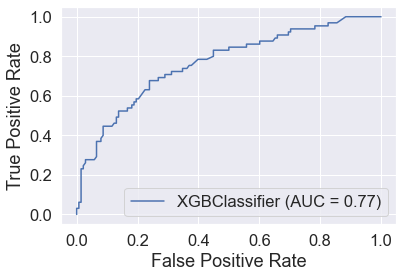

In [101]:
plot_roc_curve(xgbnew,X_test,y_test)
plt.show()

### Summary: Model tuning slightly increase AUC